In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
file_path = "Wages 2020Census cleaned.xlsx" # multi_linera regression notebook 7

In [5]:
#no.3
data = pd.read_excel(file_path)

In [6]:
print(data.head())

   Age     Sex           Marital_status  Number_of_children  Family_size  \
0   30    Male  Married, spouse present                   2            4   
1   28  Female  Married, spouse present     1 child present            3   
2   34    Male  Married, spouse present     1 child present            3   
3   58  Female   Married, spouse absent     1 child present            2   
4   39    Male     Never married/single  0 children present            1   

                 Education-degree_recode  \
0      Masterâ€™s or professional degree   
1      Masterâ€™s or professional degree   
2                    Bachelorâ€™s degree   
3  1 or more years of college, no degree   
4                    Bachelorâ€™s degree   

               Education-degree_recode 2  \
0          Master or professional degree   
1          Master or professional degree   
2                        Bachelor degree   
3  1 or more years of college, no degree   
4                        Bachelor degree   

             

In [17]:
# (a) Steps for Linear Regression in Python
# Preprocessing: Extract independent (X) and dependent (y) variables
X = data[['Age']] .values.reshape(-1, 1)  
y = data['Sex'] .values.reshape(-1, 1)        

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3492, 1), (873, 1), (3492, 1), (873, 1))

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)  

ValueError: could not convert string to float: 'Female'

In [ ]:
# (b) Assumptions:
Linearity, Independence, Homoscedasticity, Normality of residuals, No multicollinearity

In [13]:
# (c) Generate the equation from the output coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]
print(f"Linear Regression Equation: y = {beta_0:.2f} + {beta_1:.2f}x")

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [150]:
# (d) Compute MSE and MAE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f})


SyntaxError: unterminated f-string literal (detected at line 6) (3108209538.py, line 6)

In [151]:
# (e) Extract and interpret key outputs
print("\nKey Outputs:")
print(f"Intercept (β₀): {beta_0:.2f}")
print(f"Coefficient (β₁): {beta_1:.2f}")
print(f"R-squared (Training): {model.score(X_train, y_train):.2f}")
print(f"R-squared (Testing): {model.score(X_test, y_test):.2f}")


Key Outputs:


NameError: name 'beta_0' is not defined

TypeError: unhashable type: 'numpy.ndarray'

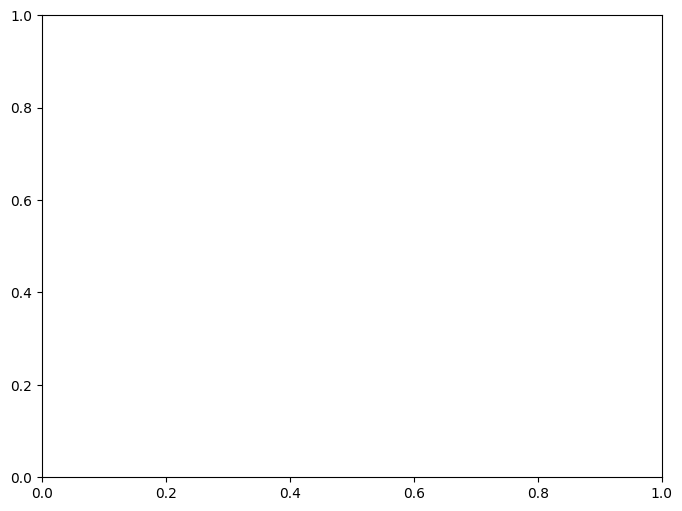

In [152]:
# (f) Plot the Linear Regression Model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Linear Regression model")
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Sex")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#no.2 # Load the datase  # junivariate linear regression notebook 6
student_df = pd.read_csv('student_performance_data.csv')
student_df

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


In [33]:
# (a) For each gender, find the major with the highest total study hours per week.
Grouped_data = student_df.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum().reset_index()   

In [44]:
major_hours = student_df.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum().reset_index()

In [48]:
highest_hours_major = major_hours.loc[major_hours.groupby('Gender')['StudyHoursPerWeek'].idxmax()]
print(highest_hours_major)


   Gender      Major  StudyHoursPerWeek
1  Female   Business               1229
7    Male  Education               1212


In [52]:
# (c) Percentage of students with and without part-time jobs.
part_time_counts = student_df['PartTimeJob'].value_counts(normalize=True) * 100
print("\n(c) Percentage of students with and without partTimeJobs:")
print(part_time_counts)



(c) Percentage of students with and without partTimeJobs:
PartTimeJob
Yes    53.6
No     46.4
Name: proportion, dtype: float64


In [54]:
# (d) For each gender, calculate the mean GPA and variance of age.
gender_stats = student_df.groupby('Gender').agg(
    mean_GPA=('GPA', 'mean'),
    variance_age=('Age', 'var')
).reset_index()
print("\n(d) Mean GPA and variance of age for each gender:")
print(gender_stats)


(d) Mean GPA and variance of age for each gender:
   Gender  mean_GPA  variance_age
0  Female  2.995352      4.005637
1    Male  2.974467      3.960130


In [77]:
# (e) Visualization showing the relationship between GPA and study hours per week.
sns.scatterplot( data=Grouped_data , x= ['GPA',y= ['StudyHoursPerWeek'], hue= ['Gender'])
plt.title('Relationship between StudyHoursPerWeek and GPA')
plt.xlabel('GPA')
plt.ylabel(['StudyHoursPerWeek'])
plt.legend(title='Gender')
plt.show()


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3431634229.py, line 2)

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#no1 # Load the dataset
data = pd.read_excel('Wages 2020Census cleaned.xlsx')

In [103]:
# (a) What is a 'typical' yearly income for these 4,365 people?
typical_income_mean = data[data ].mean()
typical_income_median = data[data].median()
print( 'Typical yearly income')
print(f"Mean: ${typical_income_mean:,.2f}")
print(f"Median: ${typical_income_median:,.2f})

SyntaxError: unterminated f-string literal (detected at line 6) (1719860150.py, line 6)

In [99]:
# (b) Do the yearly incomes of these 4,365 people vary?
income_variance = data[' typical_income'].var()
print("\n(b) Variability in typical incomes:")
print(f"Variance: {income_variance:.2f}")
if income_variance > 0:
    print("Yes, the typical yearly incomes vary.")
else:
    print("No, the  typical yearly incomes do not vary.)

SyntaxError: unterminated string literal (detected at line 8) (2202947115.py, line 8)

In [86]:
# (c) What would the values of the standard deviation and IQR be if there was no variability?
print("\n(c) Standard deviation and IQR with no variability:")
if income_variance == 0:
    print("Standard Deviation: 0")
    print("IQR: 0")
else:
    print("If there was no variability, both would be 0.")


(c) Standard deviation and IQR with no variability:


NameError: name 'income_variance' is not defined

In [87]:
# (d) What would the values of mean, median, Q1, Q3, minimum, and maximum be if no variability?
print("\n(d) Summary statistics with no variability:")
if income_variance == 0:
    print(f"Mean: {typical_income_mean:.2f}, Median: {typical_income_median:.2f}, Q1: {typical_income_median:.2f}, Q3: {typical_income_median:.2f}, Min: {typical_income_median:.2f}, Max: {typical_income_median:.2f}")
else:
    print("If there was no variability, all these values would be the same as the income value for all individuals.")


(d) Summary statistics with no variability:


NameError: name 'income_variance' is not defined

In [100]:
# (e) Causes or sources of variability: Bivariate analysis using boxplots for education level and region.
sns.boxplot(data=data, x='education_level', y='yearly_income')
plt.title('Yearly Income by Education Level)
plt.xlabel('Education Level')
plt.ylabel('Yearly Income')
plt.xticks(rotation=45)
plt.show()

SyntaxError: unterminated string literal (detected at line 3) (3456435782.py, line 3)

In [102]:
sns.boxplot(data=data, x='region', y='yearly_income')
plt.title('Yearly Income by Region)
plt.xlabel('Region')
plt.ylabel('Yearly Income')
plt.xticks(rotation=45)
plt.show()



SyntaxError: unterminated string literal (detected at line 2) (2945179568.py, line 2)

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
data = pd.read_excel("Wages_Census_cleaned.csv")

In [127]:
# defining variables
X = data[['Age']]  
y = data['Sex']      

In [137]:
Wages_Census_cleaned.csv_new = Wages_Census_cleaned_df[["Age","Sex"]]
Wages_Census_cleaned.csv_new

NameError: name 'Wages_Census_cleaned_df' is not defined

In [115]:
data =pd.read_excel( 'Wages 2020Census cleaned.xlsx').values 

x = data[:, 0].reshape(-1, 1)  
y = data[:, 1].reshape(-1, 1)
x.shape, y.shape

((4365, 1), (4365, 1))

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [117]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3492, 1)
(3492, 1)
(873, 1)
(873, 1)


In [139]:
matrix_A = np.array([[1,2,3],[2,3,4],[2,5,7],[3,5,5],[5,6,7]])
print(matrix_A)

[[1 2 3]
 [2 3 4]
 [2 5 7]
 [3 5 5]
 [5 6 7]]


In [140]:
matrix_B = np.array([[8,3],[4,3],[4,6]])
print(matrix_B)

[[8 3]
 [4 3]
 [4 6]]


In [141]:
#matrix multiplication
Result = np.dot(matrix_A, matrix_B)
print(Result)

[[28 27]
 [44 39]
 [64 63]
 [64 54]
 [92 75]]


In [144]:
# three by three identity matrix 
identity=np.eye(3)
print(identity)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [145]:
#  vector ranging from 10 to 49
vector=np.arange(10,49)
print(vector)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]


In [146]:
#creating a null matix
null =np.zeros(10)
print(null)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [148]:
# array with randaom values
from numpy import random
array = random.rand(3,3,3)
print(array)

[[[0.03943091 0.82054642 0.5603236 ]
  [0.60707712 0.97302292 0.42317421]
  [0.08269166 0.93904434 0.84471209]]

 [[0.31053574 0.17806684 0.03930779]
  [0.57396688 0.86968409 0.56456692]
  [0.21804815 0.69266559 0.79628838]]

 [[0.73706657 0.26557686 0.11923723]
  [0.25337056 0.55967406 0.45022015]
  [0.95711222 0.99697489 0.49603827]]]
